# Analysis of covid 19 India

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('covid_19_india.csv', parse_dates=['Date'], dayfirst=True)
df.head()

/var/folders/38/0xsswf3n3z54r4pdyphnhg3w0000gn/T/ipykernel_27520/728167095.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('covid_19_india.csv', parse_dates=['Date'], dayfirst=True)


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [3]:
# Keeping only required columns
df = df[['Date', 'State/UnionTerritory', 'Cured', 'Deaths', 'Confirmed']]

In [4]:
# Rename columns
df.columns = ['date', 'state', 'cured', 'deaths', 'confirmed']

In [5]:
df.head()

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [6]:
# check last 5 data
df.tail()

,date,state,cured,deaths,confirmed
5856,2020-09-02,Telengana,97402,846,130589
5857,2020-09-02,Tripura,7847,118,12702
5858,2020-09-02,Uttarakhand,14076,280,20398
5859,2020-09-02,Uttar Pradesh,176677,3542,235757
5860,2020-09-02,West Bengal,137616,3283,165721


In [7]:
# filter by today using last date
today = df[df['date'] == '2020-09-02']

In [8]:
today.head()

,date,state,cured,deaths,confirmed
5826,2020-09-02,Andaman and Nicobar Islands,2714,46,3160
5827,2020-09-02,Andhra Pradesh,339876,4053,445139
5828,2020-09-02,Arunachal Pradesh,2979,7,4212
5829,2020-09-02,Assam,86895,315,111724
5830,2020-09-02,Bihar,121560,621,138349


In [9]:
# sort data by confirmed cases
max_confirmed_cases = today.sort_values(by='confirmed', ascending=False)
max_confirmed_cases

,date,state,cured,deaths,confirmed
5845,2020-09-02,Maharashtra,584537,24903,808306
5827,2020-09-02,Andhra Pradesh,339876,4053,445139
5855,2020-09-02,Tamil Nadu,374172,7418,433969
5841,2020-09-02,Karnataka,254626,5837,351481
5859,2020-09-02,Uttar Pradesh,176677,3542,235757
5834,2020-09-02,Delhi,156728,4462,177060
5860,2020-09-02,West Bengal,137616,3283,165721
5830,2020-09-02,Bihar,121560,621,138349
5856,2020-09-02,Telengana,97402,846,130589
5829,2020-09-02,Assam,86895,315,111724


In [10]:
top_states_confirmed = max_confirmed_cases[0:5]

In [11]:
top_states_confirmed

,date,state,cured,deaths,confirmed
5845,2020-09-02,Maharashtra,584537,24903,808306
5827,2020-09-02,Andhra Pradesh,339876,4053,445139
5855,2020-09-02,Tamil Nadu,374172,7418,433969
5841,2020-09-02,Karnataka,254626,5837,351481
5859,2020-09-02,Uttar Pradesh,176677,3542,235757


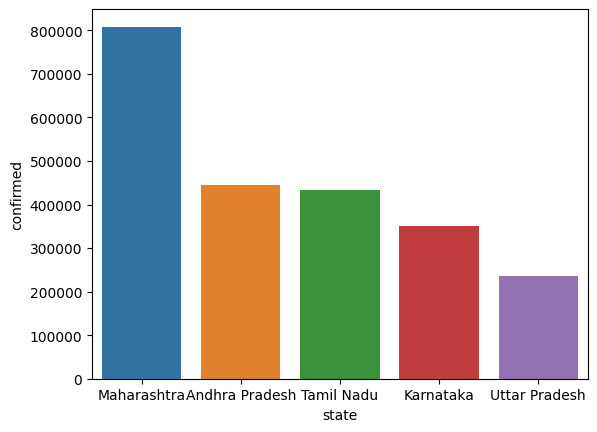

In [12]:
# now let's show the barplot with top sate confirmed data
sns.barplot(x='state', y='confirmed', data=top_states_confirmed, hue='state')
plt.show()

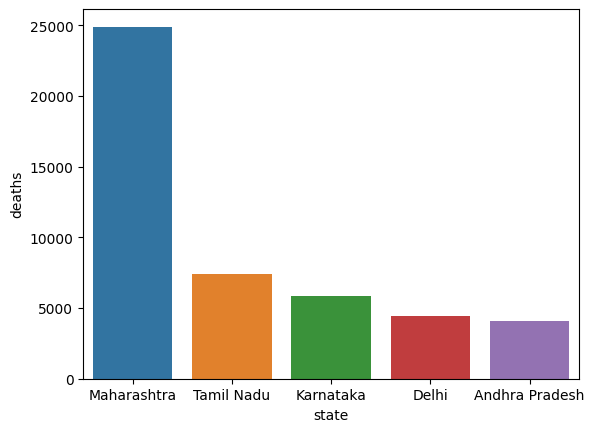

In [13]:
max_deaths_cases = today.sort_values(by='deaths', ascending=False)
top_deaths_cases = max_deaths_cases[0:5]
sns.barplot(x='state', y='deaths', data=top_deaths_cases, hue='state')
plt.show()

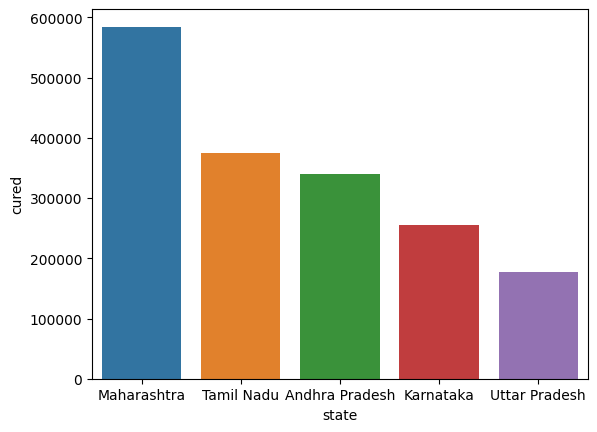

In [14]:
max_cured_cases = today.sort_values(by='cured', ascending=False)
top_cured_cases = max_cured_cases.head()
sns.barplot(x='state', y='cured', data=top_cured_cases, hue='state')
plt.show()

___

# Analysis State Wise

In [15]:
maharashtra = df[df['state'] == 'Maharashtra']
maharashtra

,date,state,cured,deaths,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14
...,...,...,...,...,...
5705,2020-08-29,Maharashtra,543170,23775,747995
5740,2020-08-30,Maharashtra,554711,24103,764281
5775,2020-08-31,Maharashtra,562401,24399,780689
5810,2020-09-01,Maharashtra,573559,24583,792541


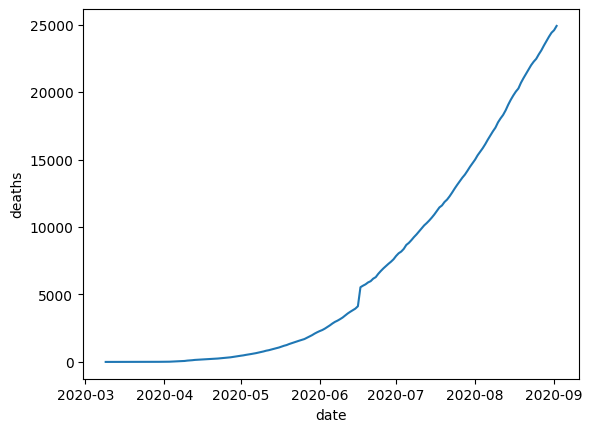

In [16]:
# Visualizing Deaths Cases
sns.lineplot(x='date', y='deaths', data=maharashtra)
plt.show()

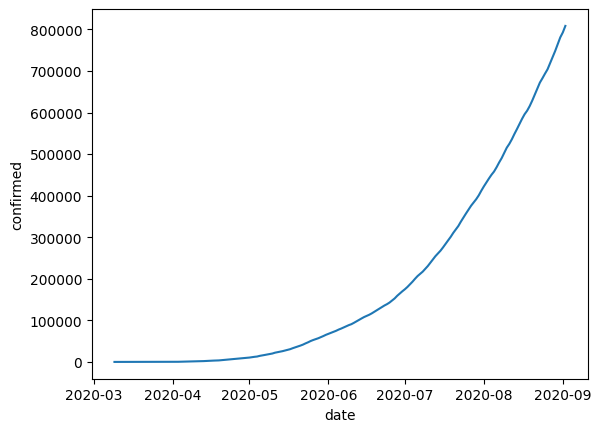

In [17]:
# Visualizing Confirmed Cases
sns.lineplot(x='date', y='confirmed', data=maharashtra)
plt.show()

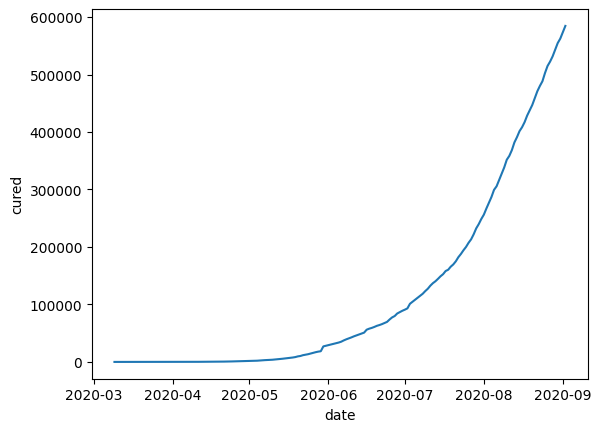

In [18]:
# Visualizing Cured Cases
sns.lineplot(x='date', y='cured', data=maharashtra)
plt.show()

In [19]:
kerala = df[df['state'] == 'Kerala']
kerala

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
5702,2020-08-29,Kerala,45854,274,69304
5737,2020-08-30,Kerala,48079,280,71701
5772,2020-08-31,Kerala,49849,287,73855
5807,2020-09-01,Kerala,51538,294,75385


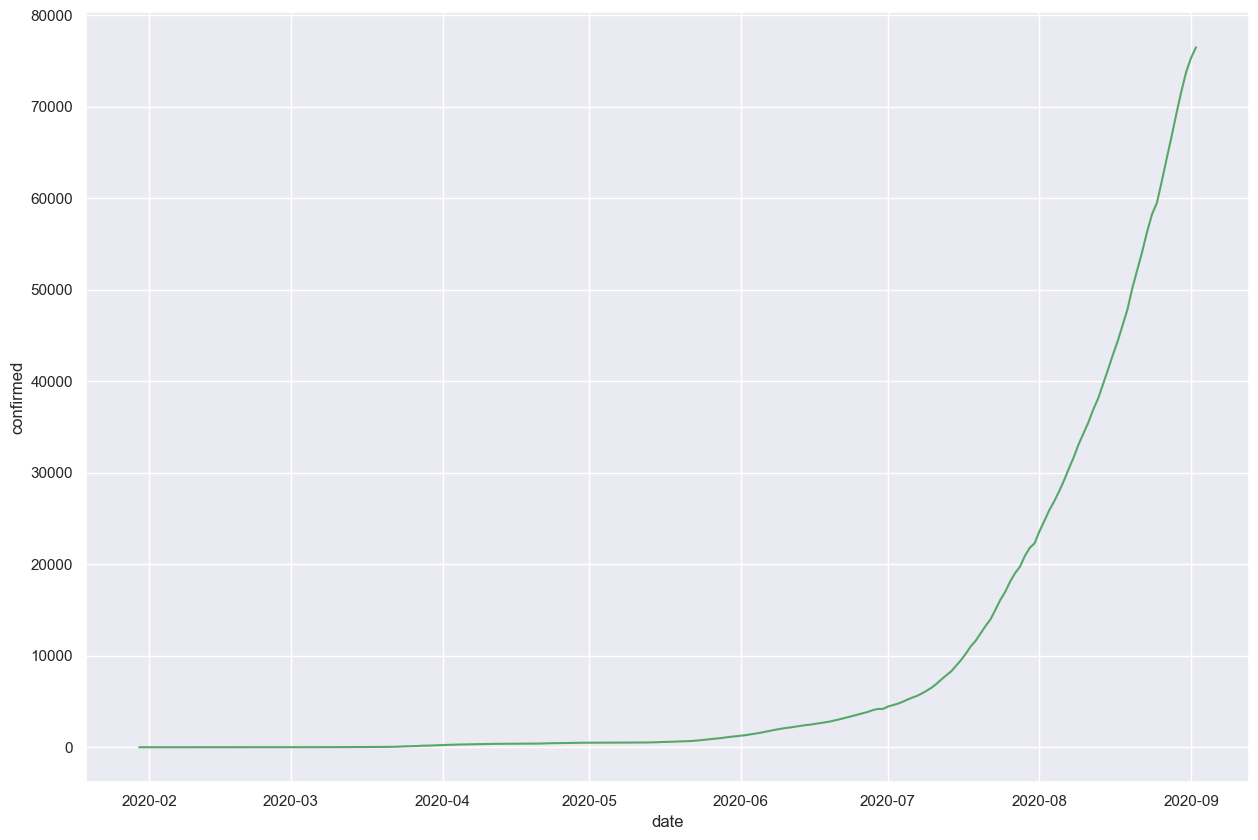

In [20]:
# Visualizing Confirmed Cases
sns.set(rc={'figure.figsize': (15, 10)})
sns.lineplot(x='date', y='confirmed', data=kerala, color='g')
plt.show()

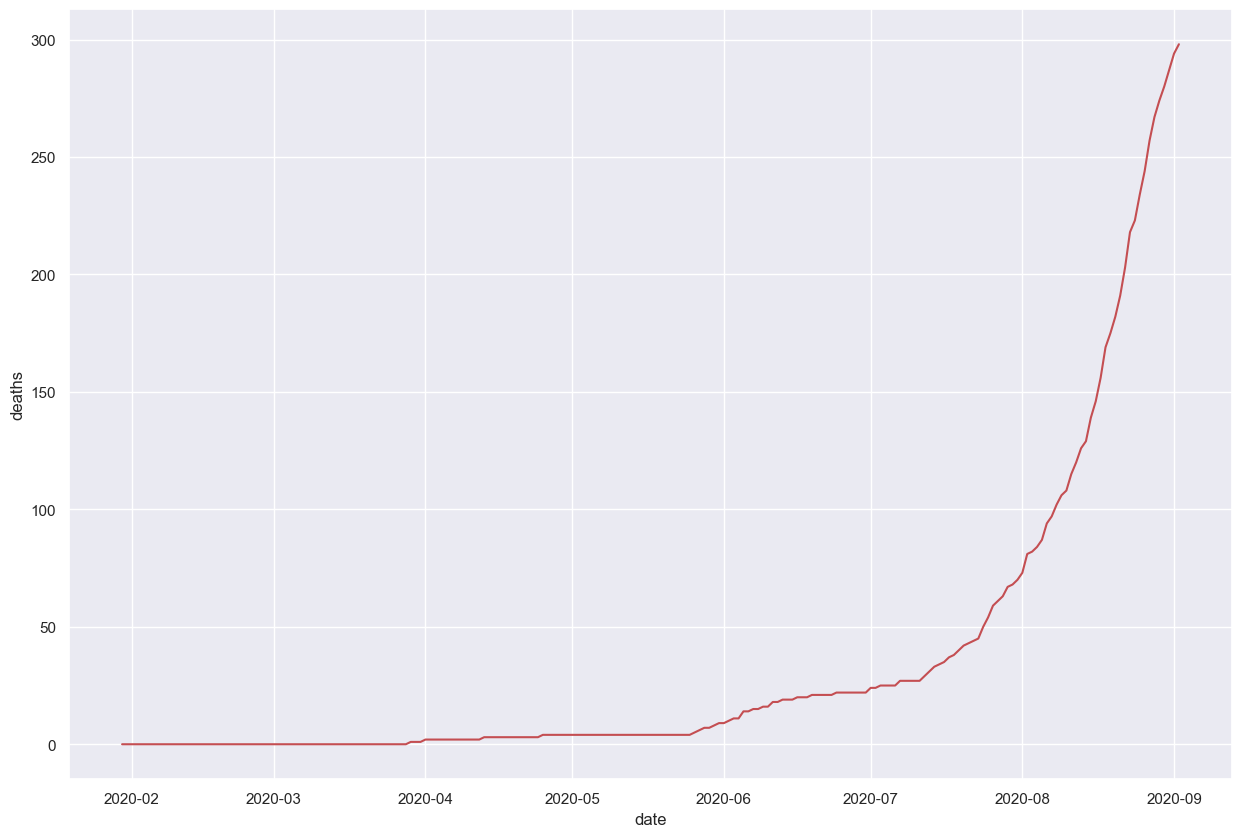

In [21]:
# Visualizing Deaths Cases
sns.set(rc={'figure.figsize': (15, 10)})
sns.lineplot(x='date', y='deaths', data=kerala, color='r')
plt.show()

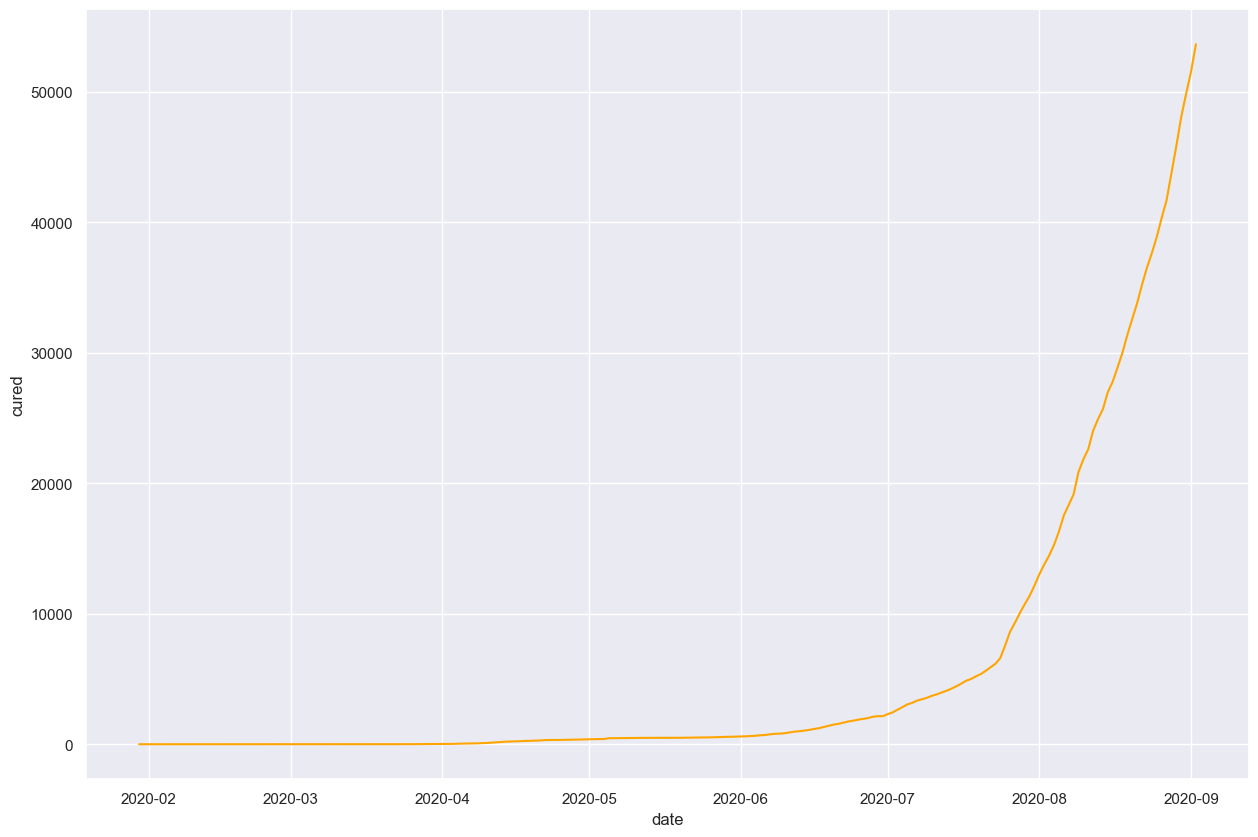

In [22]:
# Visualizing Cured Cases
sns.set(rc={'figure.figsize': (15, 10)})
sns.lineplot(x='date', y='cured', data=kerala, color='orange')
plt.show()

___

# Apply Linear Regression Model

In [23]:
maharashtra

,date,state,cured,deaths,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14
...,...,...,...,...,...
5705,2020-08-29,Maharashtra,543170,23775,747995
5740,2020-08-30,Maharashtra,554711,24103,764281
5775,2020-08-31,Maharashtra,562401,24399,780689
5810,2020-09-01,Maharashtra,573559,24583,792541


In [24]:
# Convert date time to ordinal
maharashtra['date'] = maharashtra['date'].map(dt.datetime.toordinal)
maharashtra.head()

/var/folders/38/0xsswf3n3z54r4pdyphnhg3w0000gn/T/ipykernel_27520/3596474638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maharashtra['date'] = maharashtra['date'].map(dt.datetime.toordinal)


,date,state,cured,deaths,confirmed
76,737493,Maharashtra,0,0,2
91,737494,Maharashtra,0,0,5
97,737495,Maharashtra,0,0,2
120,737496,Maharashtra,0,0,11
133,737497,Maharashtra,0,0,14


In [25]:
# set dependent and independent variable
x = maharashtra['date']
y = maharashtra['confirmed']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [28]:
x_train

2153    737566
4970    737645
5320    737655
881     737527
5355    737656
         ...  
3334    737599
4305    737626
2187    737567
2541    737577
1657    737551
Name: date, Length: 124, dtype: int64

In [29]:
y_train

2153     39297
4970    490262
5320    604358
881       1761
5355    615477
         ...  
3334    135796
4305    310455
2187     41642
2541     67655
1657     15525
Name: confirmed, Length: 124, dtype: int64

In [30]:
lr = LinearRegression()

In [31]:
# currently x_train and y_train is Dataframe so we need to remove labled
x_train = np.array(x_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)

x_test = np.array(x_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [32]:
x_train.shape

(124, 1)

In [33]:
y_train.shape

(124, 1)

In [34]:
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
y_pred = lr.predict(x_test)

In [36]:
y_pred[0:5]

array([[308705.34942436],
       [111812.49168682],
       [355959.63528156],
       [-33888.22303915],
       [277202.49218655]])